# Reinforcement Learning

Model interacts with an environment by taking actions $a$ and receiving feedback from the environment in the form of a reward $r$. 
In this sense, reinforcement learning algorithms learn by experience.

We call the trajectory of going from start to finish of a task an episode, and often our agent will learn by undergoing many episodes.

Many reinforcement learning algorithms are modeled as Markov Decision Processes (MDPs). 
In these settings, we have a concept of a *state* $s$, which encapsulates the situation of the agent (e.g. location, velocity).
From each state $s_t$, the agent takes an action $a_t$, which results in a transition from one state $s_t$ to another $s_{t+1}$.
In many settings, there is stochasticity in this transition, meaning that there's is a distribution over $s_{t+1}$ conditioned on $s_t$ and $a_t$.
Often, several of these states are considered episode ending, after which the agent can no longer make any transitions or collect any more reward.
These correspond to states such as reaching the final goal, a game concluding, or falling of a cliff.
In the end, our goal is to learn a *policy* $\pi$, or a mapping from states to actions.

In an MDP, we assume that we can always tell which state $s_t$ our agents is in.
However, this isn't always the case.
Sometimes, all we have access to are observations $o_t$ that provide information the state $s_t$, but enough to precisely pinpoint the exact one.
We call such settings Partially Observable Markov Decision Processes (POMDPs).
Imagine for example a [Roomba](https://en.wikipedia.org/wiki/Roomba) being trained to navigate a living room with RL.
From its infrared and mechanical "bump" sensors, it receives partial information ($o_t$) as to where it might be, but not a definitive location ($s_t$).
Operating as a POMDP adds a whole layer of complexity to RL algorithms.
For the rest of day though, we'll focus on MDPs, as their much simpler and easier to use to teach basic concepts.

Reinforcement learning is different from Supervised learning as we don't have a preset dataset to learn from. In most RL settings, we don't have any examples of state-action trajectories beyond what our agent experiences through trial-and-error, which are even more suboptimal.

### Example Markov Decision Process (MDP)

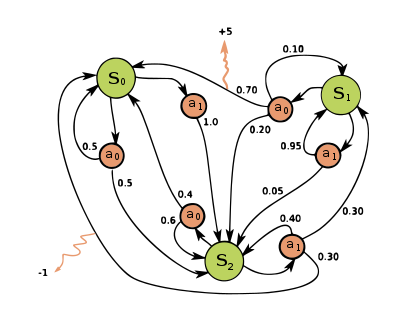

In the above diagram:
- 3 Possible States $s_0$, $s_1$, and $s_2$
- 2 actions $a_0$ and $a_1$ available from each state

Each action doesn't lead to a determinstic transition to the next state, as shown by multiple paths from each action. 

Each of the outcomes of an action are labeled with a small black number between 0 and 1.
Denotes the probability of that outcome (which state we end up at) given the the action; as these are probabilites, the sum of the probabilities of arriving at each of the next states $s_{t+1}$ given a previous state $s_t$ and selected action $a_t$ is 1.


#### Objective

Goal of the agent is to maximize the total reward $R$ it can receive over some number of steps.
Important to ensure the reward actually captures the true goal we want the agent to achieve.
Because of this the agent will always try to maximise reward without caring about other objectives, which means the agent might learn undesirable behaviours in order to gain maximum reward even though it is not wanted. Thus, the reward function needs to be designed carefully.

One countermeasure commonly deployed by RL researchers is discounted rewards.
This is done with a multiplicative term $\gamma$: a reward $T$ steps in the future is discounted as $\gamma^T r_T$.
Using discounting encourages the agent to finish the task sooner rather than later, a common implicit criterion.
With discounting then, the RL agent's goal is to maximize:
\begin{align*}
\mathbb{E}[\sum_{t=0}^{\infty} \gamma^t r_t]
\end{align*}
This is far from the complete solution to making our rewards accurately capture our desired objectives, but achieving higher rewards sooner rather than later is an almost universal preference, so we almost always add it.
Designing a good reward function can be an art is highly dependent on the task.

### Q-Learning

In Q-learning (and SARSA), we want to learn the Q values for the states in our system.

The Q value for a policy $\pi$ is a function of the state $s$ and action $a$ and is defined as the following:
\begin{equation}
Q_\pi (s,a) = \mathbb{E}\big[\sum_{t=0}^{\infty} \gamma^t r_t \big|\pi, s_0 = s, a_0 = a\big]
\end{equation}
Intuitively, the Q value is the total reward (including discounting) that the agent will gain if it takes action $a$ from state $s$ and then follows policy $\pi$ for the rest of the episode.
If Q is known exactly, the agent will attain the highest reward from $s$ if the policy $\pi$ is to pick the $a$ with the highest Q value.
So, if we know the Q values for the system, we can find the optimal policy.

At the beginning we don't know the Q-values, but we can try to learn them through experience.
Q-learning iteratively updates the Q values in the following way:
\begin{equation}
Q_\pi (s_t, a_t) \leftarrow (1 - \alpha) \cdot Q_\pi(s_t, a_t) + \alpha \cdot \big(r_t + \gamma \max_a Q_\pi(s_{t+1}, a)\big)
\end{equation}
Q-learning is an off-policy method, meaning that you don't actually learn from the trajectory you actually took (otherwise it'd be SARSA).
Instead, we learn from the greedy transition, i.e. the best action we know how to take.

We run our agent through many episodes, experiencing many $s_t \rightarrow a_t \rightarrow s_{t+1}$ transitions and rewards, and we eventually learn a good Q function (and thus a good policy).

### OpenAI Gym

There are a number of tasks that are popular benchmarks for the reinforcement learning community, such as [cart pole](https://en.wikipedia.org/wiki/Inverted_pendulum), [mountain car](https://en.wikipedia.org/wiki/Mountain_car_problem), or [Atari 2600 games](https://gym.openai.com/envs/#atari). 

[Open AI Gym](https://gym.openai.com/) has implementations of many of these environments for public use.

In [2]:
import gym

#### FrozenLake

Problem:
> *Winter is here. You and your friends were tossing around a frisbee at the park when you made a wild throw that left the frisbee out in the middle of the lake. The water is mostly frozen, but there are a few holes where the ice has melted. If you step into one of those holes, you'll fall into the freezing water. At this time, there's an international frisbee shortage, so it's absolutely imperative that you navigate across the lake and retrieve the disc. However, the ice is slippery, so you won't always move in the direction you intend.*

A visualization of FrozenLake as a grid world:

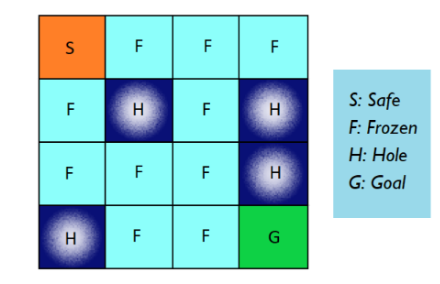

At the start of an episode, we begin in the upper left corner (S).
Our goal is to move ourself to the lower right corner (G), avoiding falling into the holes (H).

In reinforcement learning terms, each of the 16 locations on the grid are a state, and an action is attempting to move in one of four directions (left, down, right, up).
Each move will result in the agent's state changing from $s_t$ to $s_{t+1}$ as it changes location, unless it attempts to move in the direction of a wall, which results in the agent's state not changing (the agent doesn't move).
We receive a positive reward of "+1" for reaching the goal (G), discounted according to how long it took.
While there is not a negative reward for falling into a hole (H), the agent still pays a penalty in the sense that falling into the hole is episode-ending and therefore prevents it from receiving any reward. 
We want to learn a policy $\pi$ that takes us from our starting location (S) to the goal (G) in as few steps as possible.

Common misconceptions:
- Agent does NOT have knowledge of states and transition probabilities. Means that agent does not know the view of the grid, it only has knowledge of the states and actions possible. Means cannot just plot path from start to end.
- Agent does NOT know what is the end goal. It will learn the goal through the updating of its policy via experiencing rewards/penalties. 
- Agent does not have knowledge of pathfinding/physics/prior knowledge.

To create an instantiation of FrozenLake:

In [3]:
env = gym.make('FrozenLake-v1', render_mode="human")

Open AI Gym environments provide a mechanism to observe the state of the environment, and since FrozenLake is an MDP (as opposed to POMDP), the observation is the state itself.
For FrozenLake, there are 16 grid locations on the map, meaning we have 16 states.

To observe states, look at the size of the `observation_space` attribute:

In [ ]:
env.observation_space

Discrete(16)

Our agent will interact with this environment causing its state to change.
For FrozenLake, we have 4 options, each corresponding to attempting to step in a particular direction: `[Left, Down, Right, Up]`.

To observe actions, look at the size of the `action_space` of our environment:

In [ ]:
env.action_space

Discrete(4)

Before interacting with the environment, we have to first reset it to initialize it. 
Resetting also returns an observation of the first state after resetting.
In FrozenLake, we always start in the upper left corner, which corresponds to state 0.
As such, we see the `reset()` command returning `0`.

In [ ]:
env.reset()

(0, {'prob': 1})

We can visualize the FrozenLake environment by calling `render()`. 

In [ ]:
env.render()

Now, let's try moving.
On thing to keep in mind is that the original FrozenLake environment is "slippery." 
Because of the ice, if you try to go in one direction, you end up with a 1/3 chance of going in the direction you meant and the two adjacent directions each. 
For example, if we try going right, we have equal probabilities of slipping and going up and down instead.
This makes things a little more complicated, so for now, let's first turn off the stochasticity and make this a deterministic transition instead.
We do this by registering a new type of environment, and then instantiating a copy of said environment, making sure to reset it first.

In [4]:
# Non-slippery version

from gym.envs.registration import register
register(
    id='FrozenLakeNotSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': False},
)
env = gym.make('FrozenLakeNotSlippery-v0', render_mode="ansi") # ansi will not render the output in the notebook
env.reset()

(0, {'prob': 1})

We advance time in an OpenAI environment with the `step()` method, which takes as argument an `action`.
Now we move right, which corresponds to action `2`.

The output is a tuple of five elements: 
- The next observation (`object`)
- The reward (`float`)
- Whether or not the episode is done (`boolean`)
- Whether or not the episode was truncated (`boolean`)
- Dictionary of information (`dict`) that may be useful for debugging (this dict shouldn't be used in the final algorithm itself).

In [3]:
env.step(2)

# render to see what happens
env.render()

d:\Anaconda\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Once we fall into a hole, the episode is over, and we can no longer do anything.
The same is true after reaching the goal.

In [4]:
env.step(0)
env.render()

Try out random actions:

In [9]:
env.reset()
done = False

while not done:
    env.render()
    action = env.action_space.sample()
    _, _, done, _, _ = env.step(action)

Now we will use Q-learning in this toy problem.

Set up a Q table, and initialize the Q-values for all state-action pairs to zeros. Then, initialize hyperparameters, and store array of rewards.
- `alpha`: learning rate for the Q function
- `gamma`: discount rate for future rewards
- `num_episodes`: number of episodes (trajectories from start to goal/hole) our agent will learn from

Note that while we could, we're actually not going to need PyTorch in this example; PyTorch's autograd and neural network libraries are unnecessary here, as we're only going to be modifying a table of numbers.
Instead, we'll use a Numpy array to store the Q table.

In [6]:
import numpy as np

# Q-learning - initialize Q-table with zeros
Q = np.zeros([env.observation_space.n, env.action_space.n])

# Learning parameters
alpha = 0.1
gamma = 0.95
num_episodes = 2000

# array of reward for each episode
rs = np.zeros([num_episodes])

Loop through the process `num_episodes` times, resetting the environment each time.
At each step, we take the action with the highest Q value for our current state, with some randomness added in (especially at the beginning) to encourage exploration.
After each action, we update our Q table greedily based on the reward experienced and the next best action.
We also make sure to update our state, rinse, and repeat. 
We continue taking actions in an episode until it is `done`, storing the final total reward for the episode.

In [7]:
for i in range(num_episodes):
    # Set total reward and time to zero, done to False
    r_sum_i = 0
    t = 0
    done = False
    
    #Reset environment and get first new observation
    s, info = env.reset() # need to extract state from tuple
    
    while not done:
        # Choose an action by greedily (with noise) from Q table
        a = np.argmax(Q[s,:] + np.random.randn(1, env.action_space.n)*(1./(i/10+1)))
        
        # Get new state and reward from environment
        s1, r, done, _, _ = env.step(a)
        
        # Update Q-Table with new knowledge
        Q[s,a] = (1 - alpha)*Q[s,a] + alpha*(r + gamma*np.max(Q[s1,:]))
        
        # Add reward to episode total
        r_sum_i += r*gamma**t
        
        # Update state and time
        s = s1
        t += 1
    rs[i] = r_sum_i
    
# Print Q-table and rewards
print("Q-Table:")
print(Q)
print("Rewards:")
print(rs)

d:\Anaconda\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Q-Table:
[[1.42553181e-02 3.96605817e-03 7.73780937e-01 1.51949506e-02]
 [6.47461811e-03 0.00000000e+00 8.14506250e-01 1.03082696e-02]
 [4.69330917e-03 8.57375000e-01 2.01788288e-04 5.64738658e-03]
 [8.70478360e-04 0.00000000e+00 4.32288070e-10 1.66388971e-04]
 [1.54523420e-03 1.06690149e-02 0.00000000e+00 3.60471594e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.02500000e-01 0.00000000e+00 1.62783522e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.91436961e-03 0.00000000e+00 2.53550066e-02 3.16773377e-03]
 [1.56798186e-03 2.06764696e-02 1.52981815e-01 0.00000000e+00]
 [0.00000000e+00 9.50000000e-01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.79346076e-01 1.55624708e-03]
 [0.00000000e+00 9.50000000e-03 1.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00

Plot rewards vs episode number to see performance (moving average to reduce noise)

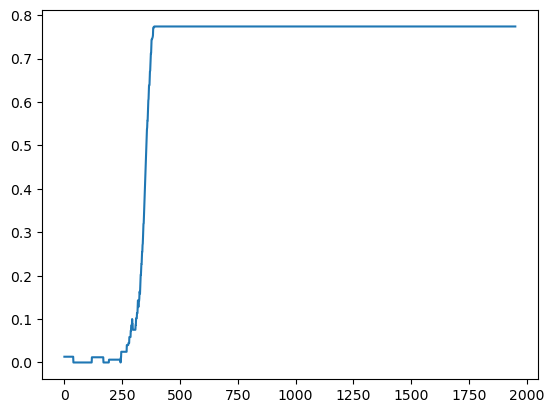

In [8]:
## Plot reward vs episodes
import matplotlib.pyplot as plt

# Sliding window average
r_cumsum = np.cumsum(np.insert(rs, 0, 0)) 
r_cumsum = (r_cumsum[50:] - r_cumsum[:-50]) / 50

# Plot
plt.plot(r_cumsum)
plt.show()

Show how often agent reaches goal, bucketed into 10 stages:

In [9]:
# Print number of times the goal was reached
N = len(rs)//10
num_Gs = np.zeros(10)

for i in range(10):
    num_Gs[i] = np.sum(rs[i*N:(i+1)*N] > 0)
    
print("Rewards: {0}".format(num_Gs))

Rewards: [  2.  39. 200. 200. 200. 200. 200. 200. 200. 200.]


#### Final Non-slippery Version

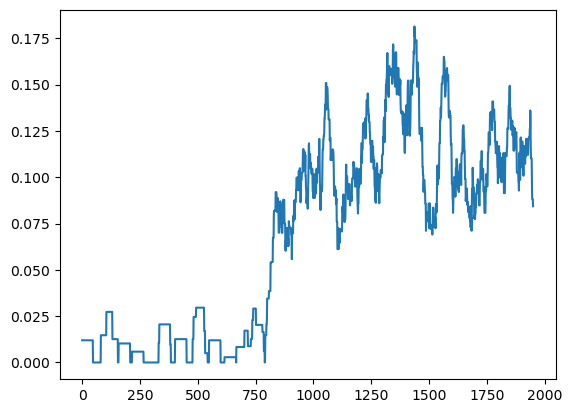

Rewards: [ 3.  4.  5.  6. 47. 75. 85. 93. 81. 69.]


In [13]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make('FrozenLake-v1', render_mode="ansi")

# Q-learning - initialize Q-table with zeros
Q = np.zeros([env.observation_space.n, env.action_space.n])

# Learning parameters
alpha = 0.1
gamma = 0.95
num_episodes = 2000

# array of reward for each episode
rs = np.zeros([num_episodes])

for i in range(num_episodes):
    # Set total reward and time to zero, done to False
    r_sum_i = 0
    t = 0
    done = False
    
    #Reset environment and get first new observation
    s, info = env.reset() # need to extract state from tuple
    
    while not done:
        # Choose an action by greedily (with noise) from Q table
        a = np.argmax(Q[s,:] + np.random.randn(1, env.action_space.n)*(1./(i/10+1)))
        
        # Get new state and reward from environment
        s1, r, done, _, _ = env.step(a)
        
        # Update Q-Table with new knowledge
        Q[s,a] = (1 - alpha)*Q[s,a] + alpha*(r + gamma*np.max(Q[s1,:]))
        
        # Add reward to episode total
        r_sum_i += r*gamma**t
        
        # Update state and time
        s = s1
        t += 1
    rs[i] = r_sum_i

## Plot reward vs episodes
# Sliding window average
r_cumsum = np.cumsum(np.insert(rs, 0, 0)) 
r_cumsum = (r_cumsum[50:] - r_cumsum[:-50]) / 50

# Plot
plt.plot(r_cumsum)
plt.show()

# Print number of times the goal was reached
N = len(rs)//10
num_Gs = np.zeros(10)

for i in range(10):
    num_Gs[i] = np.sum(rs[i*N:(i+1)*N] > 0)
    
print("Rewards: {0}".format(num_Gs))

### DQN

If the state or action space is continuous, we should use Q function instead of Q table.
Q function will take in a state and action as inputs and return Q value as output. 

Use neural networks for this purpose.
[Deep Q Networks](https://deepmind.com/research/dqn/) take such an approach.

#### Cart Pole

In this problem there is a pole attached to a hinge on a cart, with the goal being to keep the pole vertical as long as possible, without traveling too far along the rail. Because of gravity, the pole will fall unless the cart is exactly beneath the the pole's center of gravity. To prevent the pole from falling, the agent can apply a force of +1 or -1 to the cart to move it left and right along a track. The agent receives a reward of +1 for every timestamp the pole remains vertical; the game ends when the pole fall past 15 degrees from vertical or the cart moves more than 2.4 units away from the center. 

"Success" in this case will be achieving a reward of +200 while avoiding the failure conditions for 200 ticks.

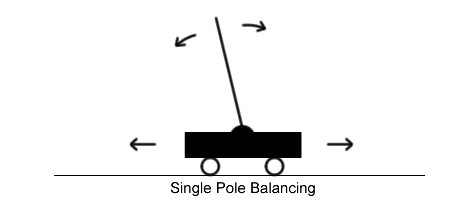

Make the environment and look at the observation space and action space like before:

In [22]:
env = gym.make('CartPole-v1', render_mode="human")
env.observation_space
env.action_space
env.reset()

(array([-0.02190249, -0.01654868, -0.03022827,  0.00463159], dtype=float32),
 {})

In [23]:
# try with random actions
done = False

while not done:
    env.render()
    action = env.action_space.sample()
    _, _, done, _, _ = env.step(action)

In [21]:
env.close() # to close the window

#### DQN for CartPole

[Episode 0] - Mean survival time over last 100 episodes was 16.0 ticks.
[Episode 100] - Mean survival time over last 100 episodes was 15.95 ticks.
[Episode 200] - Mean survival time over last 100 episodes was 40.89 ticks.
[Episode 300] - Mean survival time over last 100 episodes was 87.49 ticks.
Ran 330 episodes. Solved after 230 trials ✔


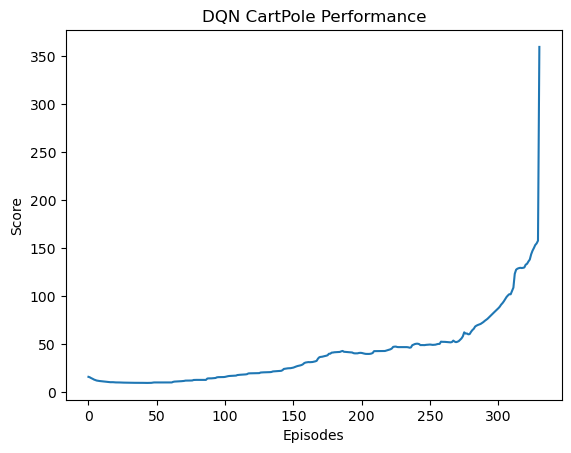

Test episode reward: 677.0


In [34]:
from collections import deque
import random
import math

import gym
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt


class DQN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(4, 24)
        self.fc2 = nn.Linear(24, 48)
        self.fc3 = nn.Linear(48, 2)

    def forward(self, x):        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x        
    

class DQNCartPoleSolver:
    def __init__(self, n_episodes=1000, n_win_ticks=195, max_env_steps=None, gamma=1.0, epsilon=1.0, epsilon_min=0.01, epsilon_log_decay=0.995, alpha=0.01, alpha_decay=0.01, batch_size=64, monitor=False, quiet=False):
        self.memory = deque(maxlen=100000)  
        self.env = gym.make('CartPole-v1')
        if monitor: self.env = gym.wrappers.Monitor(self.env, '../data/cartpole-1', force=True)
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_log_decay
        self.alpha = alpha
        self.alpha_decay = alpha_decay
        self.n_episodes = n_episodes
        self.n_win_ticks = n_win_ticks
        self.batch_size = batch_size
        self.quiet = quiet
        if max_env_steps is not None: self.env._max_episode_steps = max_env_steps

        # Init model
        self.dqn = DQN()
        self.criterion = torch.nn.MSELoss()
        self.opt = torch.optim.Adam(self.dqn.parameters(), lr=0.01)
        self.scores = []

    def get_epsilon(self, t):
        return max(self.epsilon_min, min(self.epsilon, 1.0 - math.log10((t + 1) * self.epsilon_decay)))

    def preprocess_state(self, state):
        return torch.tensor(state, dtype=torch.float32).unsqueeze(0)
    
    def choose_action(self, state, epsilon):
        if (np.random.random() <= epsilon):
            return self.env.action_space.sample() 
        else:
            with torch.no_grad():
                return torch.argmax(self.dqn(state)).item()

    def remember(self, state, action, reward, next_state, done):
        reward = torch.tensor(reward)
        self.memory.append((state, action, reward, next_state, done))
    
    def replay(self, batch_size):
        y_batch, y_target_batch = [], []
        minibatch = random.sample(self.memory, min(len(self.memory), batch_size))
        for state, action, reward, next_state, done in minibatch:
            y = self.dqn(state)
            y_target = y.clone().detach()
            with torch.no_grad():
                y_target[0][action] = reward if done else reward + self.gamma * torch.max(self.dqn(next_state)[0])
            y_batch.append(y[0])
            y_target_batch.append(y_target[0])
        
        y_batch = torch.cat(y_batch)
        y_target_batch = torch.cat(y_target_batch)
        
        self.opt.zero_grad()
        loss = self.criterion(y_batch, y_target_batch)
        loss.backward()
        self.opt.step()        
        
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def run(self):
        scores = deque(maxlen=100)

        for e in range(self.n_episodes):
            state, info = self.env.reset()
            state = self.preprocess_state(state)
            done = False
            i = 0
            while not done:
                if e % 100 == 0 and not self.quiet:
                    self.env.render()
                action = self.choose_action(state, self.get_epsilon(e))
                next_state, reward, done, _, _ = self.env.step(action)
                next_state = self.preprocess_state(next_state)
                self.remember(state, action, reward, next_state, done)
                state = next_state
                i += 1

            scores.append(i)
            mean_score = np.mean(scores)
            self.scores.append(mean_score)
            if mean_score >= self.n_win_ticks and e >= 100:
                if not self.quiet: print('Ran {} episodes. Solved after {} trials ✔'.format(e, e - 100))
                return e - 100
            if e % 100 == 0 and not self.quiet:
                print('[Episode {}] - Mean survival time over last 100 episodes was {} ticks.'.format(e, mean_score))

            self.replay(self.batch_size)
        
        if not self.quiet: print('Did not solve after {} episodes 😞'.format(e))
        return e
    
    def plot_scores(self):
        plt.plot(self.scores)
        plt.title('DQN CartPole Performance')
        plt.xlabel('Episodes')
        plt.ylabel('Score')
        plt.show()
        
    def test(self):
        test_env = gym.make('CartPole-v1', render_mode='human')
        state, info = test_env.reset()
        state = self.preprocess_state(state)
        done = False
        total_reward = 0
        while not done:
            test_env.render()
            action = self.choose_action(state, epsilon=0)  # Use a greedy policy during testing
            next_state, reward, done, _, _ = test_env.step(action)
            next_state = self.preprocess_state(next_state)
            state = next_state
            total_reward += reward
        test_env.close()
        print(f'Test episode reward: {total_reward}')

if __name__ == '__main__':
    agent = DQNCartPoleSolver()
    agent.run()
    agent.plot_scores()
    agent.test()  # Run a test episode to visualize the trained model
    agent.env.close()  # Close the environment